Необходимые импорты.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
%matplotlib inline

Генерируем выборку из распределения Лапласа размером 1000.

In [62]:
laplace_rv = sts.laplace()
sample = laplace_rv.rvs(1000)

Строим гистограмму выборки и поверх неё рисуем теоретическую плотность распределения случайной величины.

Text(0.5, 0, '$x$')

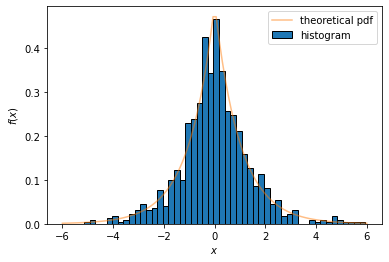

In [64]:
plt.hist(sample, density=True, bins=50, edgecolor='black', label='histogram')

x = np.linspace(-6,6,100)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)

plt.legend()

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Для оценки распределения выборочного среднего случайной величины при трёх значениях n (5, 10, 50) генерируем 1000 выборок объёма n и строим гистограммы распределений их выборочных средних. Считаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

Распределение Лапласа:
$\frac{\alpha}{2}e^{-\alpha|x - \beta|}$

$EX = \beta, DX = \frac{2}{\alpha^2}$

В нашем случае: $\beta = 0, \alpha = 1$, значит $EX = 0, DX = 2$ 

Согласно центральной предельной теореме $\hat{X_n} \sim N(EX, \frac{DX}{n}) = N(0, \frac{2}{n})$

$\sigma = \sqrt{DX} = \sqrt{\frac{2}{n}}$

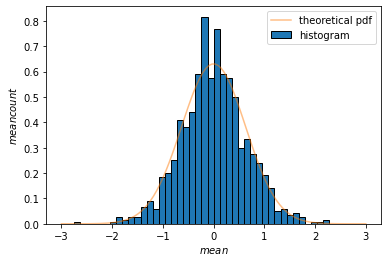

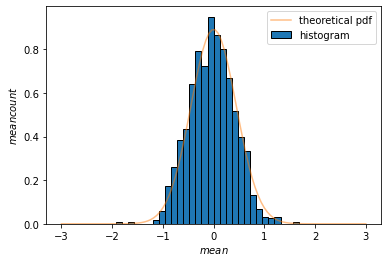

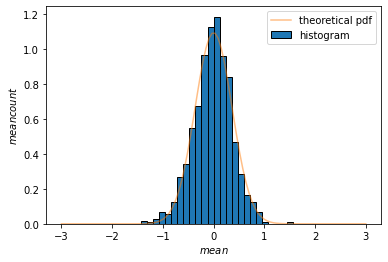

In [65]:
n_values = [5, 10, 15]
for n in n_values:
    means = []
    for sample_ind in range(1000):
        sample = laplace_rv.rvs(n)
        means.append(sample.mean())
    plt.figure(n)
    plt.hist(means, density=True, bins=50, edgecolor='black', range=(-3, 3), label='histogram')
    
    D = 2 / n
    norm_rv = sts.norm(0, math.sqrt(D))
    x = np.linspace(-3,3,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)

    plt.legend()
    
    plt.ylabel('$mean count$')
    plt.xlabel('$mean$')

### Вывод

Мы на практике убедились в верности центральной предельной теоремы: распределение выборочных средних можно приблизить нормальным распределением, при этом точность аппроксимации распределения выборочных средних нормальным с ростом $n$ увеличивается. Как видно из выкладок и графиков, чем больше $n$, тем меньше дисперсия выборочного среднего выборки размера $n$ из распределния Лапласа. 